In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from astropy.table import Table, vstack
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCRCatalogs import GCRQuery
import pandas as pd

In [25]:
path_to_cat = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/130323/cosmoDC2_small_photoz_v1/DETECTIONS_DERIVED/9943_map_associations_noBuffer.cat'
amico_data_asso = Table.read(path_to_cat, format='ascii')

In [30]:
cat_names = ['9943_map_associations', '9942_map_associations', '9816_map_associations', '9815_map_associations', '9814_map_associations', '9687_map_associations', '9686_map_associations',
             '9559_map_associations', '10450_map_associations', '10327_map_associations', '10326_map_associations', '10200_map_associations', '10199_map_associations',
             '10198_map_associations', '10072_map_associations', '10071_map_associations']
tile_names = []
for i in range(len(cat_names)):
    tile_names.append(cat_names[i].split("_")[0])

In [26]:
amico_data_asso

col1,col2
int64,str178
7062528436,0.87593555\t1\t358\t0.037188705
7062532548,0.70145613\t1\t358\t0.016173925
7062539979,0.88780063\t1\t358\t0.0060230014
7062545119,0.77349001\t1\t358\t0.010921772
7062545655,0.85093588\t1\t358\t0.019238569
7062550527,0.86246574\t1\t358\t0.016114991
7062554561,0.88835144\t1\t358\t0.018428797
7062558883,0.78846842\t1\t358\t0.10524256
7062559941,0.87057877\t1\t358\t0.035458568


In [23]:
path_to_cat = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/130323/cosmoDC2_small_photoz_v1/DETECTIONS_DERIVED/9943_map_detections_refined_noBuffer.cat'
amico_data_detec = Table.read(path_to_cat, format='ascii')

In [24]:
len(amico_data_detec)

642

In [32]:
amico_data_detec

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,195,459,50,65.687302,-38.113789,0.51999998,7.9946461,47.262947,2.6727862,468.60666,2233.7861,0.0084306598,0.99999934,550.11493,59.768822,0.32448858,0.26752058,0.0032448857,0.0026752057,9.148026e-06,1.8448445e-05,3.1926356e-05,4.8529415e-05,6.8722235e-05,9.1809874e-05,0.00011813749,0.00014936161,0.00018759783,0.0002347492,0.00029218482,0.00036502525,0.00045658674,0.00056720607,0.00070043356,0.00086050096,0.0010485565,0.0012639588,0.0015008756,0.0017506031,0.0020081401,0.0022666694,0.0025279145,0.0028046358,0.0031108893,0.0034639861,0.0038678206,0.0043105772,0.0047869165,0.0052726492,0.005742359,0.0061848471,0.0066086869,0.0070442171,0.0075281863,0.0080898106,0.0087603424,0.0095629031,0.010528118,0.011739898,0.013375035,0.015751131,0.019294782,0.024503626,0.031700891,0.040759321,0.050892036,0.06062546,0.068130754,0.071842283,0.071051486,0.066155024,0.058417775,0.049422298,0.040540446,0.032636587,0.026092062,0.02090303,0.016872518,0.013738551,0.011275293,0.0093001416,0.0076863184,0.0063579166,0.0052800798,0.0044226837,0.0037434329,0.0032112899,0.0027916539,0.0024500736,0.0021647634,0.0019199802,0.0017075761,0.0015242711,0.0013666501,0.0012300889,0.001112037,0.00101249,0.00092953112,0.00085890159,0.00079680386,0.00074074161,0.00068733678,0.00063482311,0.00058445876,0.00053725112,0.00049409893,0.00045497477,0.00041835196,0.00038313991,0.00034869841,0.00031520613,0.00028386284,0.00025517633,0.00023001109,0.00020901376,0.00019103326,0.00017627461,0.00016504692,0.00015635919,0.00014965945,0.00014457942,0.00014180171,0.00014057838,0.00014014558,0.00014042744,0.00014083205,0.00014099004,0.00014200837,0.0001439695,0.00014617751,0.0001497631,0.00015437089,0.00015961737,0.00016503579,0.00017065486,0.00017611902,0.00018094807,0.00018545504
14,207,256,35,65.758842,-39.129028,0.36999997,6.4516363,29.044168,1.5140455,324.01672,843.56366,0.0054058433,0.9941535,370.41037,30.979462,0.41750929,0.35002235,0.0041750926,0.0035002234,9.1206311e-06,1.8474981e-05,3.2219275e-05,5.1503215e-05,7.5810174e-05,0.0001051536,0.0

In [18]:
inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/amico/map_detections_refined_noBuffer_all.fits'
amico_cl_data = Table.read(inpath)['ID', 'Xphys', 'Yphys', 'Zphys','LAMBSTAR', 'SN_NO_CLUSTER', 'SN', 'uid', 'tile']

In [20]:
len(amico_cl_data[amico_cl_data['tile'] == 9943])

642

In [21]:
#with cut
def cat_to_df_cut(table, cut):
    new_table = {'mb_id' : [], 'nb_halo' : [], 'halo_id' : [], 'prob' : []}
    for i in range(len(table['col2'])):
        n = table['col2'][i].count('\t')
        cat_split = table['col2'][i].split("\t", n)
        n_detec = int(cat_split[1])
        for j in range(n_detec):
            if (float(cat_split[-1-j]) >= cut):               
                new_table['mb_id'].append(int(table['col1'][i]))
                new_table['nb_halo'].append(1+j)
                new_table['halo_id'].append(int(cat_split[2+j]))
                new_table['prob'].append(float(cat_split[-1-j]))
    df = pd.DataFrame(new_table)
    return df

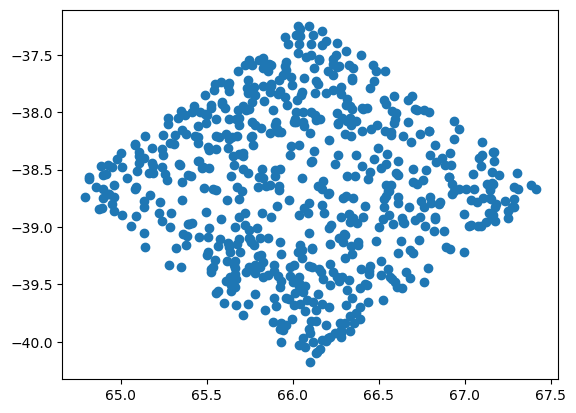

In [33]:
plt.scatter(amico_data_detec['col5'], amico_data_detec['col6'])

In [29]:
cat_to_df_cut(amico_data_asso, .5)

,mb_id,nb_halo,halo_id,prob
0,8000083376,1,234,0.629373
1,8000111079,1,234,0.610933
2,8000111080,1,234,0.660140
3,8000115019,2,22,0.522982
4,8000188768,1,234,0.576604
...,...,...,...,...
17166,9815593555,1,1076,0.686052
17167,9816182539,1,967,0.612278
17168,9816183680,1,1076,0.736547
17169,9816183686,1,1076,0.904007


In [31]:
len(tile_names)

16

In [35]:
colors = ['b', 'g', 'c', 'm', 'y', 'r', 'k', 'tab:blue', 'tab:orange', 'tab:purple','tab:brown', 'tab:green', 'tab:pink', 'tab:purple', 'yellow', 'darkviolet']

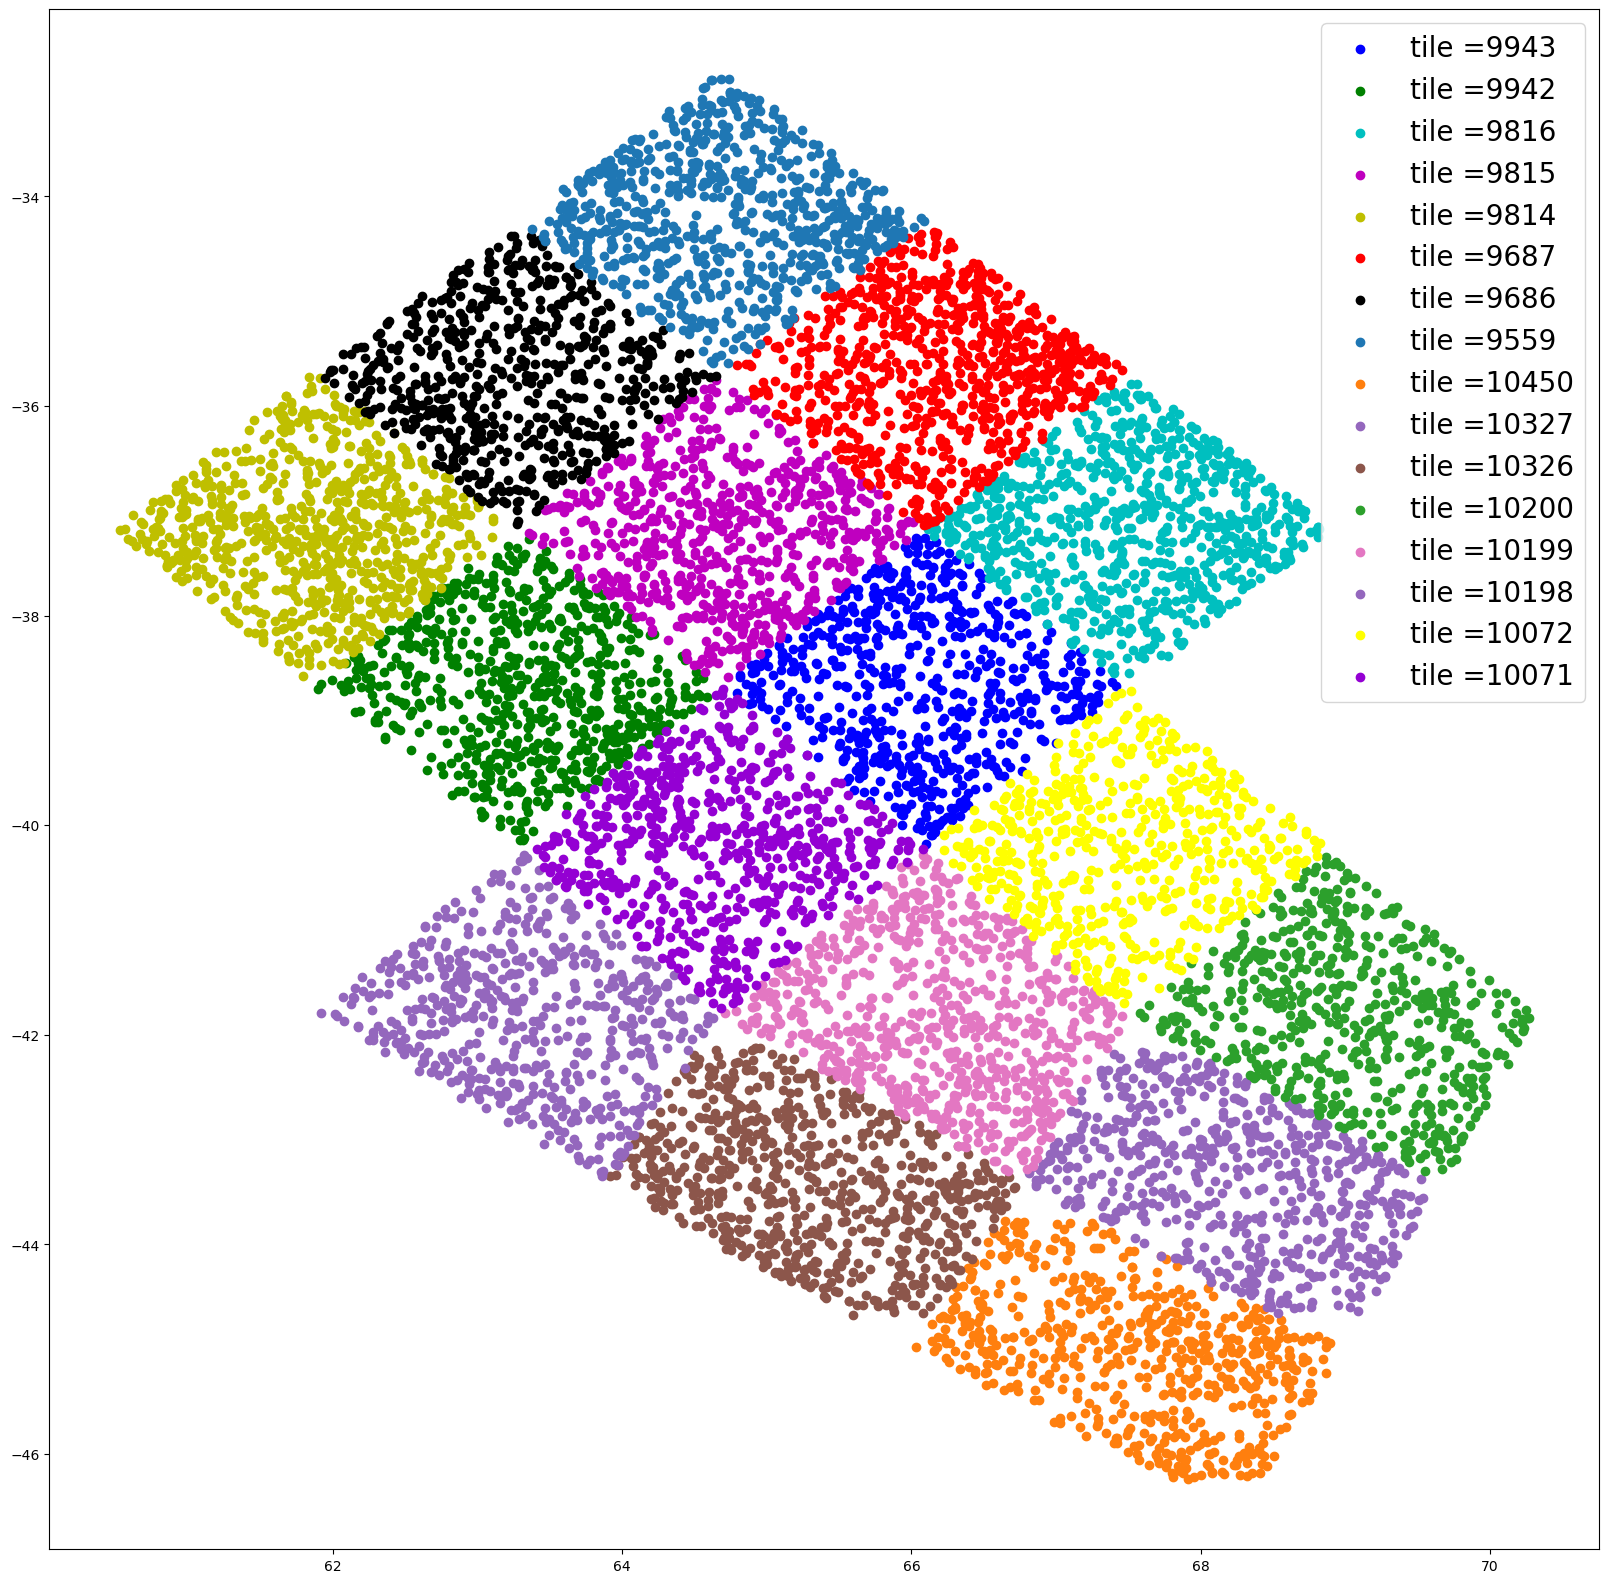

In [41]:
plt.figure(figsize = (20,20))      
for i, tile in enumerate(tile_names):
    path_to_cat = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/130323/cosmoDC2_small_photoz_v1/DETECTIONS_DERIVED/' + tile + '_map_detections_refined_noBuffer.cat'
    amico_data_detec_tile = Table.read(path_to_cat, format='ascii')
    ra = amico_data_detec_tile['col5']
    dec = amico_data_detec_tile['col6']
    plt.scatter(ra, dec, color = colors[i], label = 'tile =' + tile)
plt.legend(fontsize = 20)